### Image recognition test with pre-trained VGG-16 (or Xception) model.

Model is pre-trained ImageNet dataset. (1000 class, 1.2M images)  

If you want to try Xception model, change uncomment lines.



In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

# If you want to use Xception, uncomment followings.
#from keras.applications.xception import Xception
#from keras.applications.xception import preprocess_input, decode_predictions

from keras.preprocessing import image
import numpy as np

import PIL
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
# load the model
model = VGG16(weights='imagenet', include_top=True)
#model = Xception(weights='imagenet', include_top=True)
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

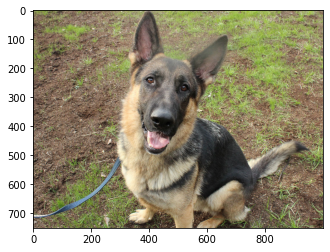

In [3]:
# chose the URL image that you want
#URL = "https://images.unsplash.com/photo-1529429617124-95b109e86bb8?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=500&amp;q=60"
URL= "http://www.worldranch.co.jp/dog_corner/images/jack_01.jpg"
 
# get the image
response = requests.get(URL)
img = Image.open(BytesIO(response.content))

##############################################
# if you want to read the image from your PC 
#############################################
# img_path = 'myimage.jpg'
# img = image.load_img(img_path, target_size=(224, 224)) # VGG
# img = image.load_img(img_path, target_size=(299, 299)) # Xception
#############################################

# display target image
plt.imshow(img) 
 

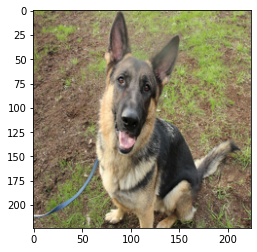

In [4]:
# resize the image according to each model (see documentation of each model)

img = img.resize((224,224)) #VGG
#img = img.resize((299,299)) #if you use Xception, uncomment this.

plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


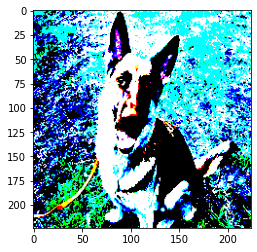

In [5]:
# convert to numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# color distribution of the test image is normalized to
# that of 1.2M ImageNet images  
# mean = (0.485, 0.456, 0.406)
# std = (0.229, 0.224, 0.225)
x = preprocess_input(x)
print(x.shape)

# see image after the pre_process
# sometimes looks strange, but neuralnets identify contents
# based on this. If we don't use this, performance is dropped. 
plt.imshow(np.squeeze(x))


In [6]:
output = model.predict(x)
 
# return the top 10 detected objects
label = decode_predictions(output, top=10)
label

40960/35363 [==================================] - 0s 0us/step


[[('n02106662', 'German_shepherd', 0.92557096),
  ('n02105162', 'malinois', 0.06543809),
  ('n02105412', 'kelpie', 0.0015635225),
  ('n02107142', 'Doberman', 0.0007370805),
  ('n02091467', 'Norwegian_elkhound', 0.00069095567),
  ('n02105056', 'groenendael', 0.0006065633),
  ('n03803284', 'muzzle', 0.0004949445),
  ('n02090721', 'Irish_wolfhound', 0.00039762756),
  ('n02109961', 'Eskimo_dog', 0.00028093244),
  ('n04254680', 'soccer_ball', 0.00027909892)]]